In [17]:
import matplotlib.pyplot as plt
import numpy as np
from kheppy.core import Simulation
%matplotlib inline

In [18]:
worlds = {
    'circles': 
    ['../../WD/walls_circles.wd', 
     200, 200,
     [[100, 100, 60]
     ]
    ],
    'circles_asym': 
    ['../../WD/walls_circles_asym.wd', 
     200, 230,
     [[95, 85, 60], 
      [25, 180, 20]
     ]
    ]           
}

In [23]:
world = worlds['circles_asym']

# world properties
path = world[0]
w, h = world[1], world[2]
circles = world[3]
e = 5
ww = w + 2*e
hh = h + 2*e

In [24]:
def generate_points(num, seed):
    pts = []
    with Simulation(path) as sim:
        sim.set_controlled_robot(1)
        sim.reset()
        sim.set_seed(seed)
        for i in range(num):
            sim.move_robot_random()
            pts.append(sim.get_robot_position())
        return pts
            
def plot(pts, title):
#     print('With duplicates:    ', len(pts))
    pts = list(set([tuple(elem) for elem in pts]))
#     print('Without duplicates: ', len(pts))
    xs, ys = zip(*pts)
    plt.plot(xs, ys, 'o', markersize=2)

    plt.axvline(0, e/hh, 1 - e/hh, w, color='r', alpha=0.5)
    plt.axvline(w, e/hh, 1 - e/hh, color='r', alpha=0.5)
    plt.axhline(0, e/ww, 1 - e/ww, color='r', alpha=0.5)
    plt.axhline(h, e/ww, 1 - e/ww, color='r', alpha=0.5)

    plt.axvline(15, (15+e) / hh, 1 - (15+e) / hh, color='g', alpha=0.5)
    plt.axvline(w-15, (15+e) / hh, 1 - (15+e) / hh, color='g', alpha=0.5)
    plt.axhline(15, (15+e) / ww, 1 - (15+e) / ww, color='g', alpha=0.5)
    plt.axhline(h-15, (15+e) / ww, 1 - (15+e) / ww, color='g', alpha=0.5)

    for cx, cy, r in circles:
        circle=plt.Circle((cx, cy), r, color='r', alpha=0.3)
        plt.gcf().gca().add_artist(circle)
        circle=plt.Circle((cx, cy), r+15, color='g', alpha=0.3, fill=False)
        plt.gcf().gca().add_artist(circle)
        
    plt.axis((-e, w+e, -e, h+e))
    plt.title('{} (num pts: {})'.format(title, len(pts)))

In [25]:
# starting points
points = generate_points(num=20, seed=50)
points_test = generate_points(num=1000, seed=13)

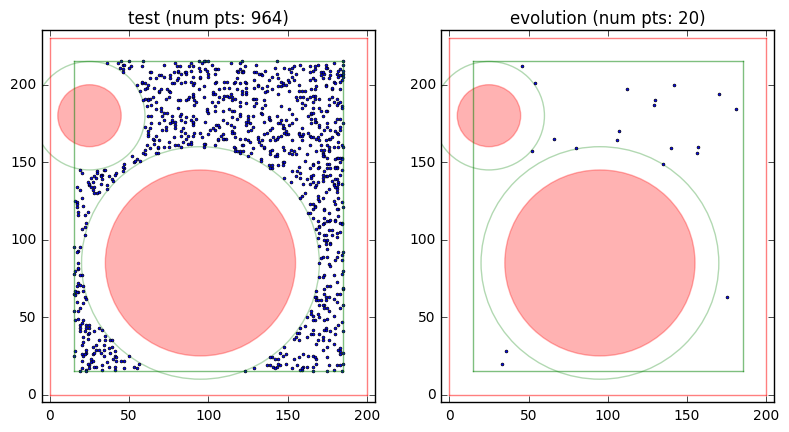

In [26]:
plt.figure(figsize=(2.25*ww/50, hh/50))
plt.subplot(1, 2, 1)
plot(points_test, 'test')
plt.subplot(1, 2, 2)
plot(points, 'evolution')